# Load required Libraries

In [6]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dataset: ECG heartbeats from the LTAF database

### References
- [1] https://academic.oup.com/europace/article/9/7/466/553888

Dataset Original Length n:  3000
Dataset Sampled Length n:  3000
../datasets/ground_truth/ecg-heartbeat-av_gt.csv


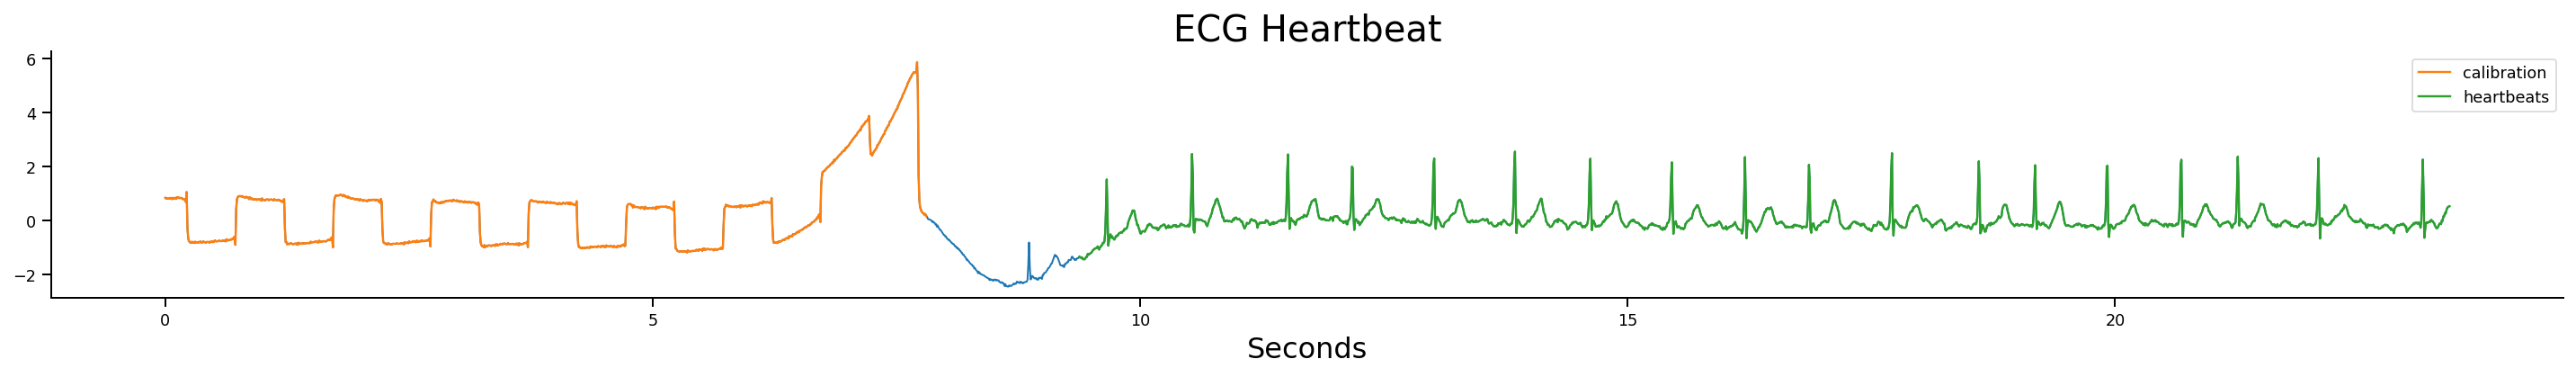

In [7]:
file = 'ecg-heartbeat-av.csv'
ds_name = "ECG Heartbeat"
series, df_gt = ml.read_dataset_with_index(file) 
plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)

Compute ks: 100%|██████████| 18/18 [00:00<00:00, 121.13it/s]


Motif Length: 12 	 0.09375 	AU_PEF: 0.361 	#Elbows: 5


Compute ks: 100%|██████████| 18/18 [00:00<00:00, 112.69it/s]


Motif Length: 25 	 0.1953125 	AU_PEF: 0.4 	#Elbows: 5


Compute ks: 100%|██████████| 18/18 [00:00<00:00, 81.09it/s]


Motif Length: 37 	 0.2890625 	AU_PEF: 0.36 	#Elbows: 5


Compute ks: 100%|██████████| 18/18 [00:00<00:00, 66.79it/s]


Motif Length: 50 	 0.390625 	AU_PEF: 0.279 	#Elbows: 5


Compute ks: 100%|██████████| 18/18 [00:00<00:00, 65.94it/s]


Motif Length: 62 	 0.484375 	AU_PEF: 0.267 	#Elbows: 4


Compute ks: 100%|██████████| 18/18 [00:00<00:00, 58.31it/s]


Motif Length: 75 	 0.5859375 	AU_PEF: 0.375 	#Elbows: 4


Compute ks: 100%|██████████| 18/18 [00:00<00:00, 43.56it/s]


Motif Length: 87 	 0.6796875 	AU_PEF: 0.462 	#Elbows: 4


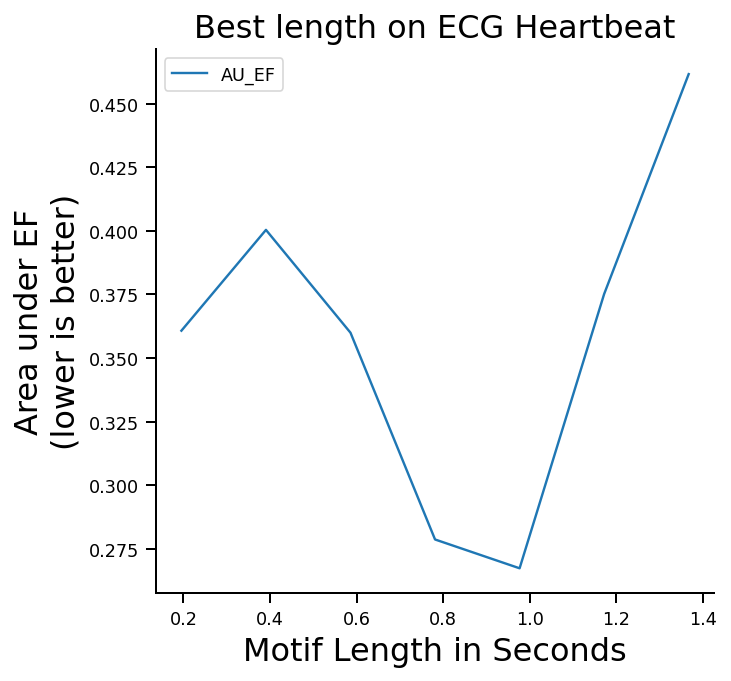

In [8]:
ks = 20
length_range = np.arange(25,200,25) 
motif_length = plot_motif_length_selection(
    ks, series, file, 
    motif_length_range=length_range, ds_name=ds_name)

Compute ks: 100%|██████████| 18/18 [00:01<00:00, 17.90it/s]


Chosen window-size: 125
Identified Elbow Points [ 6  9 16]
Filtered Elbow Points [6, 16]


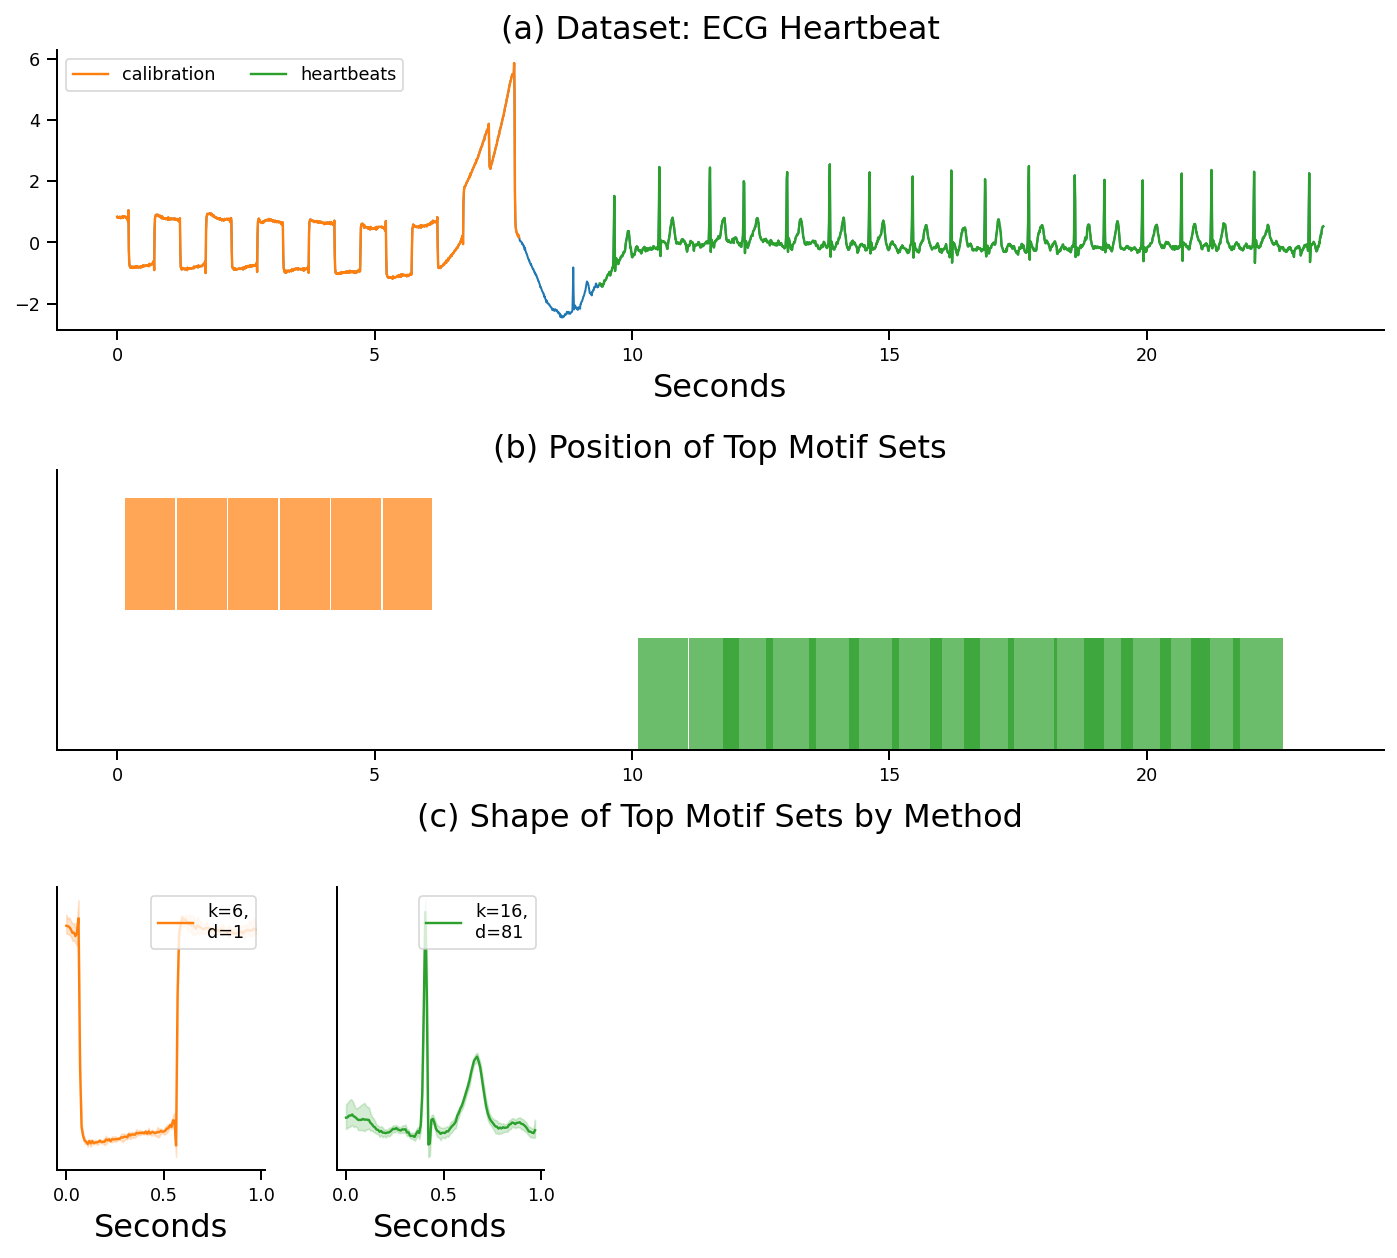

In [9]:
#ks = 20
#motif_length=125
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    ds_name=ds_name, 
    motif_length=motif_length,
    ground_truth=df_gt)

<hr>

# Dataset: Muscle Activation Dataset

### References
- [1] https://link.springer.com/content/pdf/10.1007/s10618-007-0070-1.pdf
- [2] http://www.cs.ucr.edu/~eamonn/iSAX/iSAX.html

Dataset Original Length n:  14950
Dataset Sampled Length n:  14950
../datasets/ground_truth/muscle_activation_gt.csv


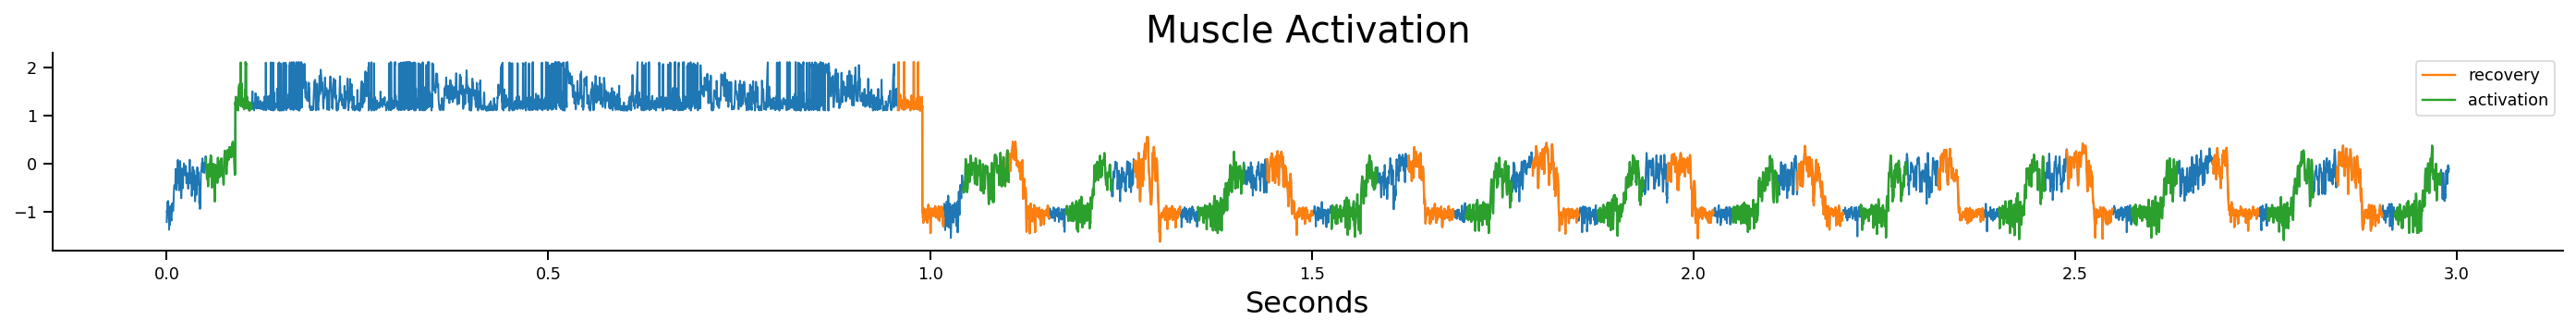

In [10]:
file = 'muscle_activation.csv'
ds_name = "Muscle Activation"

series, df_gt = ml.read_dataset_with_index(file) 
plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)

## Motif-Length Selection

Compute ks: 100%|██████████| 13/13 [00:02<00:00,  6.01it/s]


Motif Length: 200 	 0.04 	AU_PEF: 0.212 	#Elbows: 3


Compute ks: 100%|██████████| 13/13 [00:02<00:00,  5.19it/s]


Motif Length: 250 	 0.05 	AU_PEF: 0.212 	#Elbows: 1


Compute ks: 100%|██████████| 13/13 [00:02<00:00,  4.36it/s]


Motif Length: 300 	 0.06 	AU_PEF: 0.179 	#Elbows: 2


Compute ks: 100%|██████████| 13/13 [00:03<00:00,  3.90it/s]


Motif Length: 350 	 0.07 	AU_PEF: 0.185 	#Elbows: 2


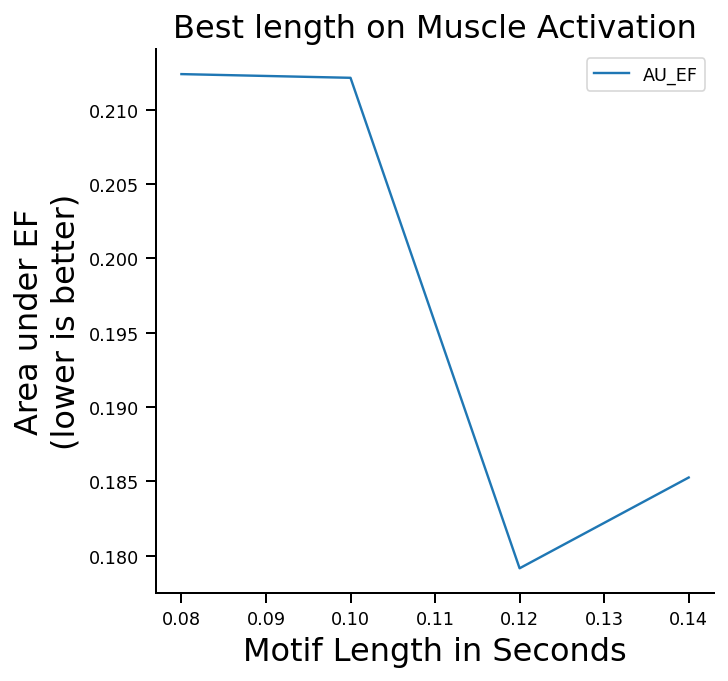

In [11]:
k = 15
length_range = np.arange(400,701,100) 

motif_length = plot_motif_length_selection(
    k, series, file, length_range, ds_name=ds_name)

## Top-1 k-Motiflets

Compute ks: 100%|██████████| 13/13 [00:11<00:00,  1.09it/s]


Chosen window-size: 600
Identified Elbow Points [ 9 12]
Filtered Elbow Points [12]


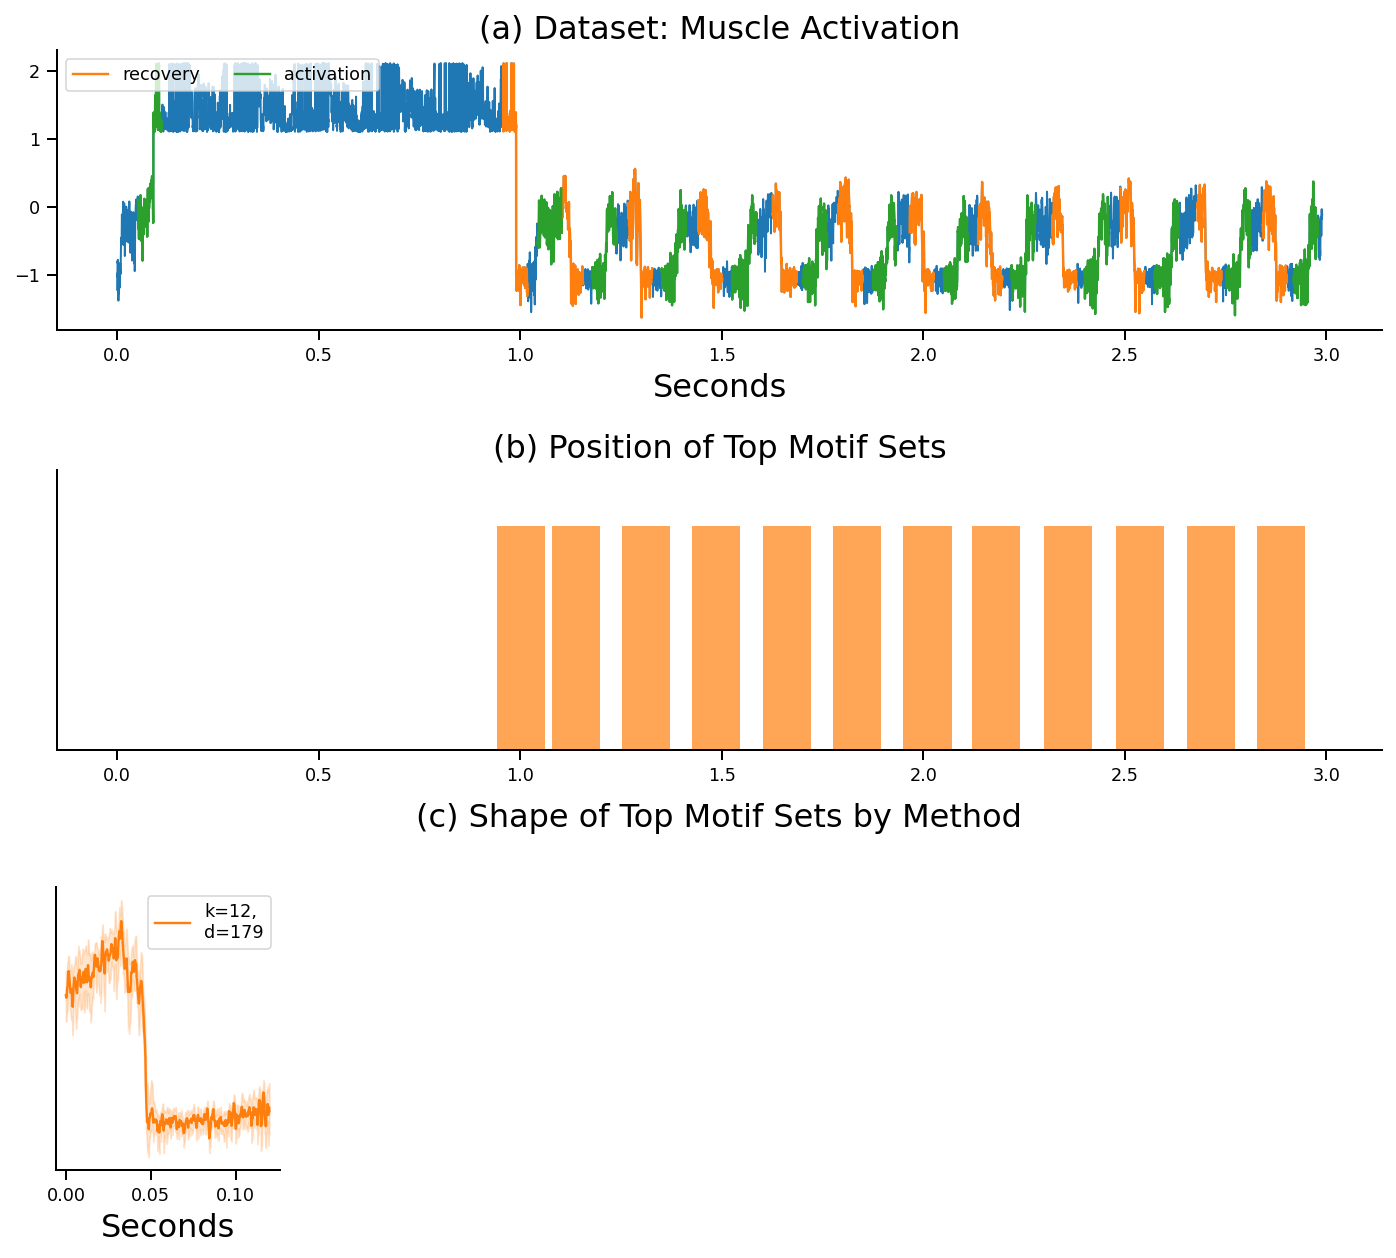

In [12]:
dists, candidates, elbow_points = plot_elbow(
    k, series, file, ds_name=ds_name,
    motif_length=motif_length, ground_truth=df_gt)

## Top-2 k-Motiflets

Compute ks: 100%|██████████| 13/13 [00:07<00:00,  1.66it/s]


Chosen window-size: 600
Identified Elbow Points [ 8 11]
Filtered Elbow Points [11]


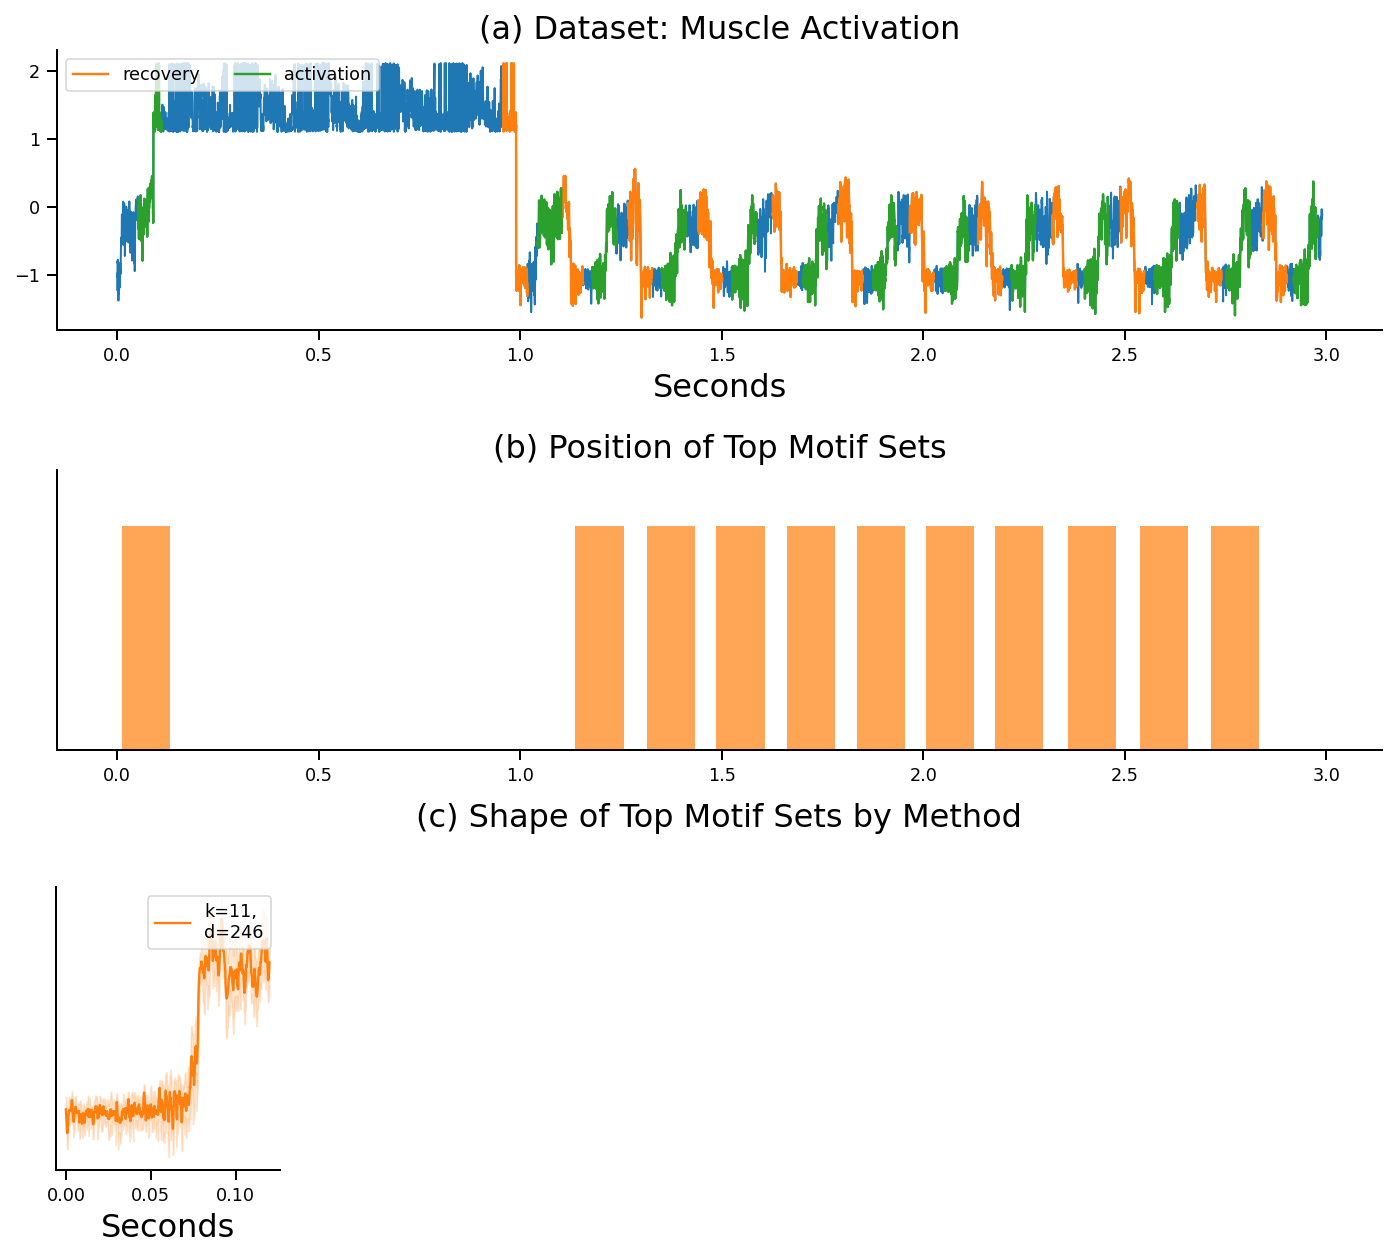

In [13]:
dists2, candidates2, elbow_points2 = plot_elbow(
    k, series, file, ds_name=ds_name, 
    exclusion=candidates, motif_length=motif_length, ground_truth=df_gt)

<hr>

# Dataset: Physiodata - EEG sleep data
    
### References:
- [1] https://link.springer.com/content/pdf/10.1007/s004220000144.pdf
- [2] https://epubs.siam.org/doi/pdf/10.1137/1.9781611972795.41

In [14]:
file = 'npo141.csv' # Dataset Length n:  269286
ds_name="EEG Sleep Data"
series, _ = ml.read_dataset_with_index(file)
plot_dataset(file, series, ds_name=ds_name)

Dataset Original Length n:  10358
Dataset Sampled Length n:  10358


ValueError: too many values to unpack (expected 2)

In [ ]:
ks = 20
length_range = np.arange(15,151,10)

motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, ds_name=ds_name)

# k-Komplex

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=115, ds_name=ds_name)

# Sleep Spindles

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=25, ds_name=ds_name)

<hr>

# Dataset: Winding

### References 
- [1] https://homes.esat.kuleuven.be/~tokka/daisydata.html
- [2] https://grammarviz2.github.io/grammarviz2_site/morea/motif/experience-m1.html

In [ ]:
file = "winding_col.csv"
ds_name = "Industrial winding process"
series, _ = ml.read_dataset_with_index(file)
plot_dataset(file, series, ds_name=ds_name)

# Motif length selection

In [ ]:
ks = 12
length_range = np.arange(20,150,10)

motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, ds_name=ds_name)

# Top-1 Motiflets

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=motif_length, ds_name=ds_name)

# Top-2 Motiflet

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=motif_length, 
    exclusion=candidates, ds_name=ds_name)

# Motif length 130

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=130, ds_name=ds_name, idx=3)

<hr>

# Dataset: fNIRS Brain Imaging

## References:
- [1] https://dl.acm.org/doi/pdf/10.1145/3097983.3097993

In [ ]:
file = "fNIRS_subLen_600.csv" 
ds_name="fNIRS"
series, _ = ml.read_dataset_with_index(file) 
series = series[:5000]
plot_dataset(file, series, ds_name=ds_name)

## Motif Length Selection

In [ ]:
ks = 20
length_range = np.arange(50,201,10)
motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, ds_name=ds_name)

# Top-1 k-Motiflets

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=motif_length, ds_name=ds_name, filter=True)

# Top-2 k-Motiflets

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=80, ds_name=ds_name, idx=3, filter=True)

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=80, ds_name=ds_name, exclusion=candidates, filter=True)

<hr>
<hr>
<hr>
<hr>

# Datasets not shown in Paper

<hr>
<hr>
<hr>
<hr>

# Dataset:  Power demand by ECN

<!---

> shows the power demand data of a research facility (i.c. ECN)
> Yet, the variation over the week is harder to discern and the day-patterns of Saturdays and Sundays are obscured. [1]

- Officehoursarefollowedstrictly.Mostpeoplearrivebetween 8:30 and 9:00 am, and leave between 4:00 and 5:00 pm. Fur- thermore, in the morning the number of employees present is slightly higher than in the afternoon.
- On Fridays and in the summer fewer people are present (clus- ter 722);
- OnFridaysinthesummerevenfewerpeoplearepresent(clus- ter 718);
- Intheweekendandatholidaysonlyveryfewpeoplearework- ing (cluster 710): security and fire brigade;
- Holidays in the Netherlands in 1997 were January 1st, March 28th, March 31st, April 30th, May 5th, May 8th, May 19th, December 25th and 26th.
- SchoolvacationsarevisibleinSpring(May3rdtoMay11th), in Autumn (October 11th to October 19th), and in Winter (De- cember 21th to December 31st);
- Many people take a day off after a holiday (cluster 721);
- On December 5th many people left at 4:00 PM. Dutch peo- ple will immediately know the explanation: On this day we celebrate Santa Claus and are allowed to leave earlier!

Mi 1.1.97 - Mi 31.12.97 0 - 24 Uhr, 15 Minuten Interval
--> 
### References 
- [1] http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.105.685&rep=rep1&type=pdf

In [ ]:
file = 'power_data.dat' # Dataset Length n:  ???
ds_name = "Power Data"

data = ml.read_dataset(file)
factor = 3

date_time_idx=(pd.date_range(start='1/1/1997', end='01/01/1998', freq ='15min'))
series = pd.Series(data = data, index=date_time_idx[::factor][:len(data)])
series.index.name = 'Year'
series = series[:5000]

plot_dataset(file, series, ds_name=ds_name)

In [ ]:
ks = 20
length_range = np.arange(20,261,14)
motif_length = plot_motif_length_selection(
    ks, data, file, motif_length_range=length_range,ds_name=ds_name)

# Weekly pattern

<!--
- Holidays in the Netherlands in 1997 were January 1st, March 28th, March 31st, April 30th, May 5th, May 8th, May 19th, December 25th and 26th.

- School vacations are visible in Spring(May3rdtoMay11th), in Autumn (October 11th to October 19th), and in Winter (De- cember 21th to December 31st);

- Sa + SU no-one works
-->

In [ ]:
# week
weekly = int(96 * 7 / factor / 4)
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=weekly, ds_name=ds_name)

# Daily Pattern

<!--
- Officehours are followed strictly. Most people arrive between 8:30 and 9:00 am, and leave between 4:00 and 5:00 pm. Furthermore, in the morning the number of employees present is slightly higher than in the afternoon.
-->

In [ ]:
# day
daily=int(96 / factor / 4)
dists, candidates, elbow_points = plot_elbow(
    30, series, file, motif_length=daily, ds_name=ds_name)

<hr>

# Tide

<!--
> a time series of subtidal sea level fluctuations for Crescent City, which is located at latitude 410 4 5 ' N and longitude 1240 ll'W on the open coast of Northern California. Inside its harbor, a permanent tide gauge is maintained by the National Ocean Service (NOS). The gauge measures water levels every 6 minutes within a stilling well that consists of a vertical tube with small open- ings near the bottom. These openings admit the tides and lower-frequency fluctuations into the well, but suppress the higher-frequency fluctuations due to wind waves and swell. Periodic leveling surveys ensure that the reference level of the gauge remains constant relative to the surrounding land. The time series used here was collected from January 1980 to December 1991 and was reduced to hourly data by sub- sampling. The hourly data contain a 2-week gap in summer 1990 (filled with predicted tides and a local mean) and a few shorter gaps (filled by interpolation). 

> The MODWT analysis of subtidal sea level fluctuations at Crescent City shows that these fluctuations are strongest during the winter regime (November-March) and occur preferentially at the scales 4-16 days.
--> 
### References 
- [1] https://www.tandfonline.com/doi/pdf/10.1080/01621459.1997.10474042?casa_token=H6cMRWAX5QcAAAAA:Io48CiaQb-byC3qRrpMA0vvv4aJ4Jqe4rnp0w2JeJHs_sNxCcoibFNjrO0VsslwGM3lcxujga0eS


In [ ]:
file = 'tide.dat' 
ds_name = "Sea level fluctuations for Crescent City"

data = ml.read_dataset(file)
date_time_idx=(pd.date_range(start='1/1/1980', end='01/01/1992', freq ='12H'))
series = pd.Series(data = data, index=date_time_idx[:len(data)])
series.index.name = 'Year'

plot_dataset(file, series, ds_name=ds_name)

In [ ]:
ks = 30
length_range = np.arange(14,8 * 14 + 1,14)

motif_length = plot_motif_length_selection(
    ks, series, file, 
    motif_length_range=length_range)

In [ ]:
# 1.5 Weeks
#motif_length = 21
#dists, candidates, elbow_points = plot_elbow(
#    ks, series, file, motif_length=motif_length, ds_name=ds_name)

In [ ]:
# 1 Weeks
motif_length = 2 * 7
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=motif_length, ds_name=ds_name)

In [ ]:
# 2 Weeks
motif_length = 2 * 7 * 2
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=motif_length, ds_name=ds_name, idx=2)

In [ ]:
# 1 Mo = 4 Weeks
motif_length = 2 * 7 * 4
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=motif_length, ds_name=ds_name, idx=3)

<hr>

# Personalised real-time Energy Feedback

<!--
> A basic wash cycle takes approximately half an hour (approximately 350 sample points). By setting motif length equal to one basic cycle, we can find a frequently repeating pattern, representing a wash cycle, as shown in Fig. 1 (Motif A). However, after running our algorithm, we also found one frequent motif (Motif B) of length 1534 (approximately 2.5 hours), and a rare motif (Motif C) of length 2791 (approximately 4.6 hours) that only happened a few times in the time series.

- 10 seconds interval??

-->

### References
- [1] https://arxiv.org/pdf/1802.04883.pdf
- [2] D. Murray, J. Liao, L. Stankovic, V. Stankovic, R. Hauxwell-Baldwin, C. Wilson, M. Coleman, T. Kane, and S. Firth. A data management platform for personalised real-time energy feedback. 8 2015.

In [ ]:
file = 'dishwasher.txt' # Dataset Length n:  ???
ds_name = "Personalised real-time Energy Feedback"

data = ml.read_dataset(file)

seconds_idx=np.arange(0, 245151, 24) / 600
series = pd.Series(data = data, index=seconds_idx)
series.index.name = 'Minutes'

plot_dataset(file, series, ds_name=ds_name)

In [ ]:
ks = 14
length_range = np.arange(30,120,10)

motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range)

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=motif_length, ds_name=ds_name)

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, 
    motif_length=motif_length, 
    exclusion=candidates, ds_name=ds_name)

<hr>

# Italian Power Demand

<!--
> The dataset is 3 years of Italian power demand data which represents the hourly electrical power demand of a small Italian city for 3 years beginning on Jan 1st 1995 and ending on May 31th 1998. What we want here is to summarize this dataset, showing “Snippets” of data. Snippets are representative patterns present in the data, not rare events like discords, neither (almost) perfectly similar as motifs. [1]
--> 

### References
- [1] https://www.cs.ucr.edu/~eamonn/100_Time_Series_Data_Mining_Questions__with_Answers.pdf

In [ ]:
file = 'italianpowerdemand.csv' # Dataset Length n:  ???
ds_name = "Italian Power Demand"
ks = 20
length_range = np.range(10,120,10)

data = ml.read_dataset(file)
factor = 2
date_time_idx=(pd.date_range(start='1/1/1995', end='06/01/1998', freq ='1h'))
series = pd.Series(data = data, index=date_time_idx[::factor][:len(data)])

print("Dataset Length n: ", len(data))

series = series[:365*int(24/factor)]
plot_dataset(file, series, ds_name=ds_name)

In [ ]:
#motif_length = plot_motif_length_selection(
#    ks, series, file, motif_length_range=length_range)

In [ ]:
# weekly
weekly = int(24 / factor * 7)
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=weekly, ds_name=ds_name)

In [ ]:
# daily
weekly = int(24 / factor)
dists, candidates, elbow_points = plot_elbow(
    ks, series, file, motif_length=weekly, ds_name=ds_name, idx=2)

<hr>

# Walk Jog Run


### References 
- https://link.springer.com/article/10.1007/s10618-018-0589-3

In [ ]:
file = "walk-jog-run.txt"
ds_name="Walk Jog Run"

data = ml.read_dataset(file)
print("Dataset Length n: ", len(data))

plot_dataset(file, series, ds_name=ds_name)

In [ ]:
ks = 15
length_range = np.range(10,250,10)
motif_length = plot_motif_length_selection(
    ks, data, file, motif_length_range=length_range)

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, data, file, 
    motif_length=180, ds_name=ds_name)

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    ks, data, file, 
    motif_length=motif_length, ds_name=ds_name)

In [ ]:
dists2, candidates2, elbow_points2 = plot_elbow(
    ks, data, file, motif_length=motif_length, 
    exclusion=candidates, ds_name=ds_name)

In [ ]:
dists3, candidates3, elbow_points3 = plot_elbow(
    ks, data, file, 
    motif_length=motif_length, 
    exclusion=np.concatenate((candidates, candidates2)), 
    ds_name=ds_name)

<hr>

# Dataset Epilepsy


## References:
- [1] https://dl.acm.org/doi/pdf/10.1145/3097983.3097993

In [ ]:
file = "epilepsy_walking_subLen_16.mat.csv" 
ds_name="Epilepsy"

data = ml.read_dataset_with_index("mat2/"+file) 
print("Dataset Length n: ", len(data))

series = pd.Series(data = data.values[:, 0], index=data.index)
series.index.name = 'Motif Length'

plot_dataset(file, series, ds_name=ds_name)

In [ ]:
ks = 10
length_range = np.range(10,251,25)
motif_length = plot_motif_length_selection(
    ks, series, file, motif_length_range=length_range, ds_name=ds_name)

In [ ]:
dists, candidates, elbow_points = plot_elbow(
    30, series, file, 
    motif_length=135, ds_name=ds_name)

In [ ]:
dists2, candidates2, elbow_points2 = plot_elbow(
    10, 
    series, 
    file, 
    motif_length=30, 
    ds_name=ds_name)

<hr>